# Diabetes Prediction

# 데이터 소개

**Pima Indians Diabetes Database**

TASK : 환자가 당뇨병을 가지고 있는지 분류(Classification)

csv 파일의 컬럼은 아래와 같습니다.
- Pregnancies : 임신한 횟수
- Glucose : 글루코스 수치
- Blood Pressure : 혈압
- SkinThickness : 삼두의 피부 두께
- Insulin : 인슐린 수치
- BMI : BMI 지수
- DiabetesPedigreeFunction : 가족력 수치
- Age : 나이
- Outcome : 당뇨병 유무 (1 또는 0)


# Q1. Task 에 따른 Train Data와 Target Data는 무엇이 되어야 할지 정의해보시오.

In [2]:
'''
train data : Pregnancies, Glucose, Blood Pressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age
target data : outcome
'''

'\ntrain data : Pregnancies, Glucose, Blood Pressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age\ntarget data : outcome\n'

# Settings

In [3]:
# 구글 드라이브에 코랩을 연동합니다.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# `os`는 파일경로를 관리해주는 라이브러리 입니다.
# 파일경로 관리를 os 라이브러리를 통해 효율적으로 관리할 수 있습니다.
import os
print(os.getcwd()) # get current working directory
os.chdir("/content/drive/MyDrive/ML_Session/") # change directory
print(os.getcwd())

/content
/content/drive/MyDrive/ML_Session


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

sns.set()

In [6]:
data = pd.read_csv("diabetes.csv")
col=['Glucose' ,'BloodPressure' ,'SkinThickness', 'Insulin' ,'BMI']
for i in col:
  data[i].replace(0,data[i].mean(),inplace=True)

# EDA(Exploratory Data Analysis)

처음 데이터(raw data)에서 데이터를 확인하고 분석 및 출력(시각화)하면서 인사이트를 얻어내는 과정.

# Q2. 데이터를 불러온 후에 개요를 살펴보기 위해 다음 메소드를 사용합니다.

# 각 메소드를 사용해보고 어떤 정보를 알 수 있는지 정리해보세요.



In [7]:
# head()
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [8]:
# info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [9]:
# describe()
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
# data.shape
data.shape

(768, 9)

# Q3. 모든 ML패키지가 결측치를 자동으로 처리하지 않습니다. 결측치 존재 여부를 확인해보세요.

결측치가 존재한다면, 이를 처리하는 방법에 대해 알아보고 처리해보세요.

해당 과제에서 결측치를 처리한 방법이 올바른 방법인지 검토해보세요.

결측치는 판단에 따라 drop 할 수 있고, 특정 값으로 채울 수 있습니다.

데이터를 채우는 방법으로는 수치형 데이터는 통계를 이용해서, 범주형 데이터는 unique(), value_counts() 등으로 처리합니다.

In [11]:
# 결측치 존재 여부 확인
data.isna().sum() # 없음

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
# 결측치 처리
"""
1) 결측치 삭제
df.dropna(axis=0, inplace=True) # 행 삭제
df.dropna(axis=1, inplace=True) # 열 삭제

2) 평균 값으로 대체
df.fillna(df.mean(), inplace=True)

3) 중앙값 또는 최빈값으로 대체
df.fillna(df.median(), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

4) 특정 값으로 대체
df.fillna(0, inplace=True)
df.fillna('unknown', inplace=True)

5) 이전 값 또는 다음 값으로 대체
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)
"""

"\n1) 결측치 삭제\ndf.dropna(axis=0, inplace=True) # 행 삭제\ndf.dropna(axis=1, inplace=True) # 열 삭제\n\n2) 평균 값으로 대체\ndf.fillna(df.mean(), inplace=True)\n\n3) 중앙값 또는 최빈값으로 대체\ndf.fillna(df.median(), inplace=True)\ndf.fillna(df.mode().iloc[0], inplace=True)\n\n4) 특정 값으로 대체\ndf.fillna(0, inplace=True)\ndf.fillna('unknown', inplace=True)\n\n5) 이전 값 또는 다음 값으로 대체\ndf.fillna(method='ffill', inplace=True)\ndf.fillna(method='bfill', inplace=True)\n"

# Q4. 결측치가 존재하는 경우, 다양한 보간법에 대하여 정리하고, 그에 대한 코드를 작성해보세요.

In [16]:
"""

1) 선형 보간
df.interpolate(method='linear', inplace=True)

특성: 주변 두 점 사이를 직선으로 연결하여 결측치를 예측
적용 시나리오: 데이터가 선형적인 추세를 따르는 경우에 적합, 단순한 추세를 따르는 시계열 데이터에 유용.

2) 다항식 보간
df.interpolate(method='polynomial', order=2, inplace=True)
특성: 다항식을 사용하여 결측치를 예측합니다. order 매개변수를 통해 다항식의 차수를 조절 가능.
적용 시나리오: 데이터가 다항식 형태의 패턴을 따르는 경우에 사용. 추세가 곡선 형태를 띄는 경우에 유용.

3)시간에 따른 선형 보간
df.interpolate(method='time', inplace=True)
특성: 시간에 따라 선형 보간을 수행함. 시계열 데이터에서 시간 간격을 고려하여 결측치를 예측.
적용 시나리오: 시계열 데이터에서 시간에 따른 변화를 고려할 때 사용.


4) Nearest Interpolatio
df.interpolate(method='nearest', inplace=True)
특성: 결측치 주변의 가장 가까운 이웃 값을 사용하여 대체.
적용 시나리오: 이웃 값이 결측치를 잘 설명할 수 있는 경우에 사용. 이산적인 값들이 있는 데이터에 적합.


5) 스프라인 보간
df.interpolate(method='spline', order=2, inplace=True)
특성: 이웃 값 사이를 부드러운 스플라인 곡선으로 연결하여 결측치를 예측.
적용 시나리오: 데이터가 부드러운 곡선 형태를 따르는 경우에 사용. 곡선적인 패턴을 따르는 시계열 데이터에 유용.
"""

"\n\n1) 선형 보간\ndf.interpolate(method='linear', inplace=True)\n\n특성: 주변 두 점 사이를 직선으로 연결하여 결측치를 예측\n적용 시나리오: 데이터가 선형적인 추세를 따르는 경우에 적합, 단순한 추세를 따르는 시계열 데이터에 유용.\n\n2) 다항식 보간\ndf.interpolate(method='polynomial', order=2, inplace=True)\n특성: 다항식을 사용하여 결측치를 예측합니다. order 매개변수를 통해 다항식의 차수를 조절 가능.\n적용 시나리오: 데이터가 다항식 형태의 패턴을 따르는 경우에 사용. 추세가 곡선 형태를 띄는 경우에 유용.\n\n3)시간에 따른 선형 보간\ndf.interpolate(method='time', inplace=True)\n특성: 시간에 따라 선형 보간을 수행함. 시계열 데이터에서 시간 간격을 고려하여 결측치를 예측.\n적용 시나리오: 시계열 데이터에서 시간에 따른 변화를 고려할 때 사용.\n\n\n4) Nearest Interpolatio\ndf.interpolate(method='nearest', inplace=True)\n특성: 결측치 주변의 가장 가까운 이웃 값을 사용하여 대체.\n적용 시나리오: 이웃 값이 결측치를 잘 설명할 수 있는 경우에 사용. 이산적인 값들이 있는 데이터에 적합.\n\n\n5) 스프라인 보간\ndf.interpolate(method='spline', order=2, inplace=True)\n특성: 이웃 값 사이를 부드러운 스플라인 곡선으로 연결하여 결측치를 예측.\n적용 시나리오: 데이터가 부드러운 곡선 형태를 따르는 경우에 사용. 곡선적인 패턴을 따르는 시계열 데이터에 유용.\n"

# Data Visualization

데이터 시각화는 데이터에 대한 직관적인 이해와 인사이트 도출을 위해 필수적입니다.

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

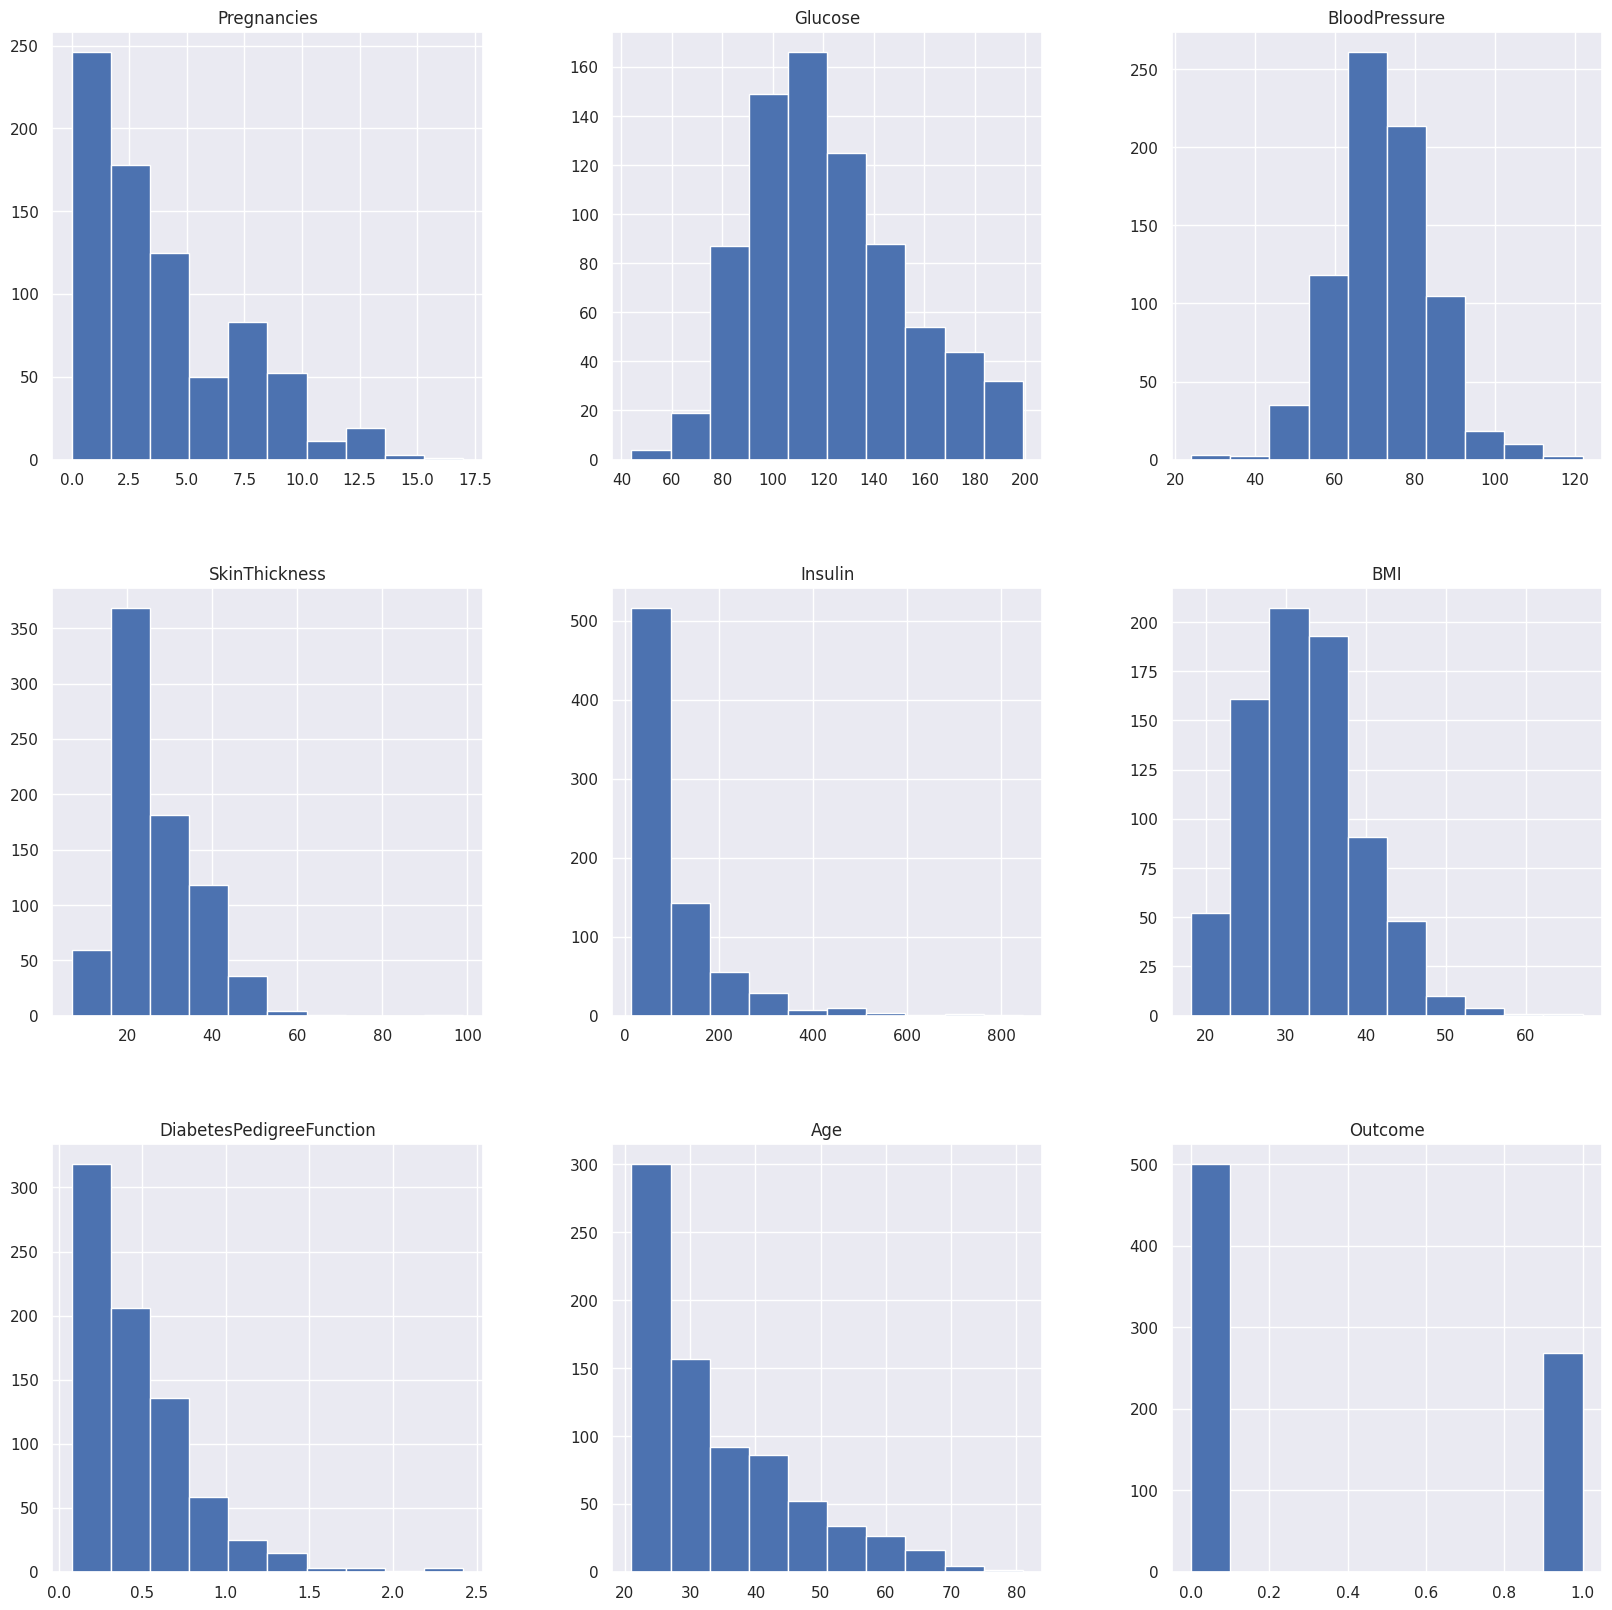

In [17]:
data.hist(figsize = (20,20))

# Q5. correlation plot을 그리고, 해당 plot에서 얻은 인사이트를 정리해보세요.

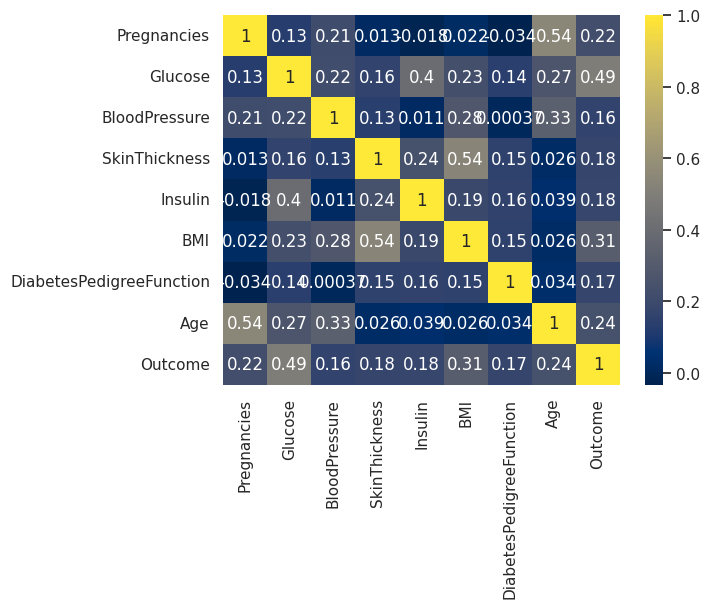

'\ntarget 데이터인 outcome과 각 변수 간의 상관계수를 알 수 있음.\nPregnancies : 0.21\nGlucose : 0.47\nBlood Pressure : 0.16\nSkinThickness : 0.15\nInsulin : 0.15\nBMI : 0.32\nDiabetesPedigreeFunction : 0.17\nAge : 0.22\n'

In [18]:
# 상관관계 plot

corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="cividis")
plt.rcParams['font.size'] = 5
plt.show()

"""
target 데이터인 outcome과 각 변수 간의 상관계수를 알 수 있음.
Pregnancies : 0.21
Glucose : 0.47
Blood Pressure : 0.16
SkinThickness : 0.15
Insulin : 0.15
BMI : 0.32
DiabetesPedigreeFunction : 0.17
Age : 0.22
"""

<Axes: xlabel='Outcome', ylabel='Age'>

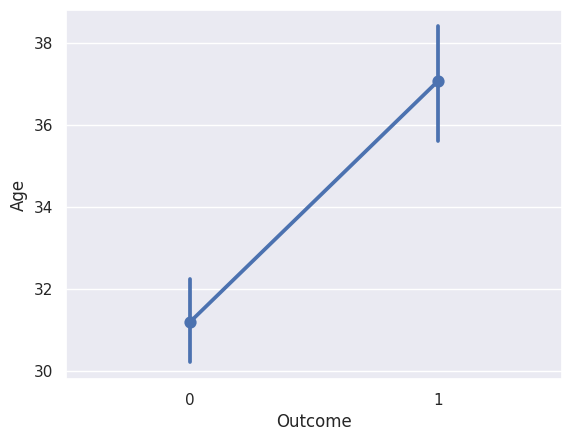

In [19]:
sns.pointplot(x = "Outcome", y = "Age", data = data)

<Axes: >

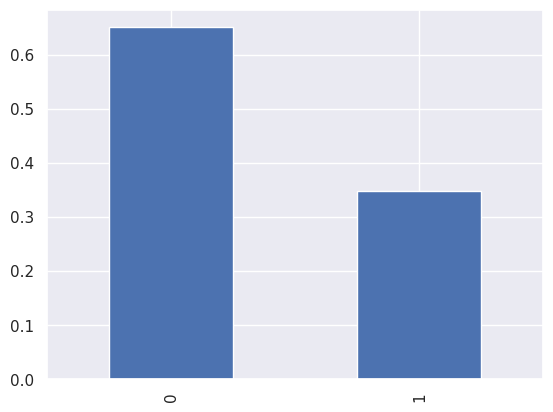

In [20]:
# Class imbalance 확인
data.Outcome.value_counts(normalize=True).plot(kind = "bar")

<Axes: xlabel='Age', ylabel='Insulin'>

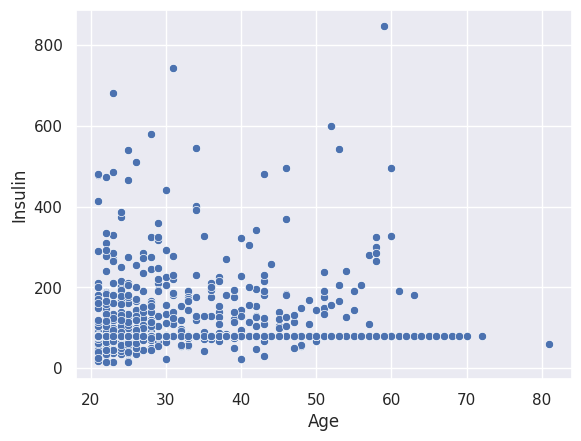

In [21]:
sns.scatterplot(x = "Age", y = "Insulin", data = data)

<Axes: xlabel='Outcome', ylabel='Pregnancies'>

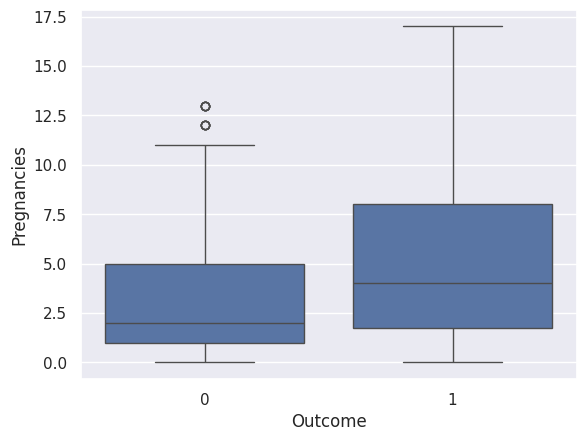

In [22]:
sns.boxplot(x = "Outcome", y = "Pregnancies", data = data)

KeyboardInterrupt: 

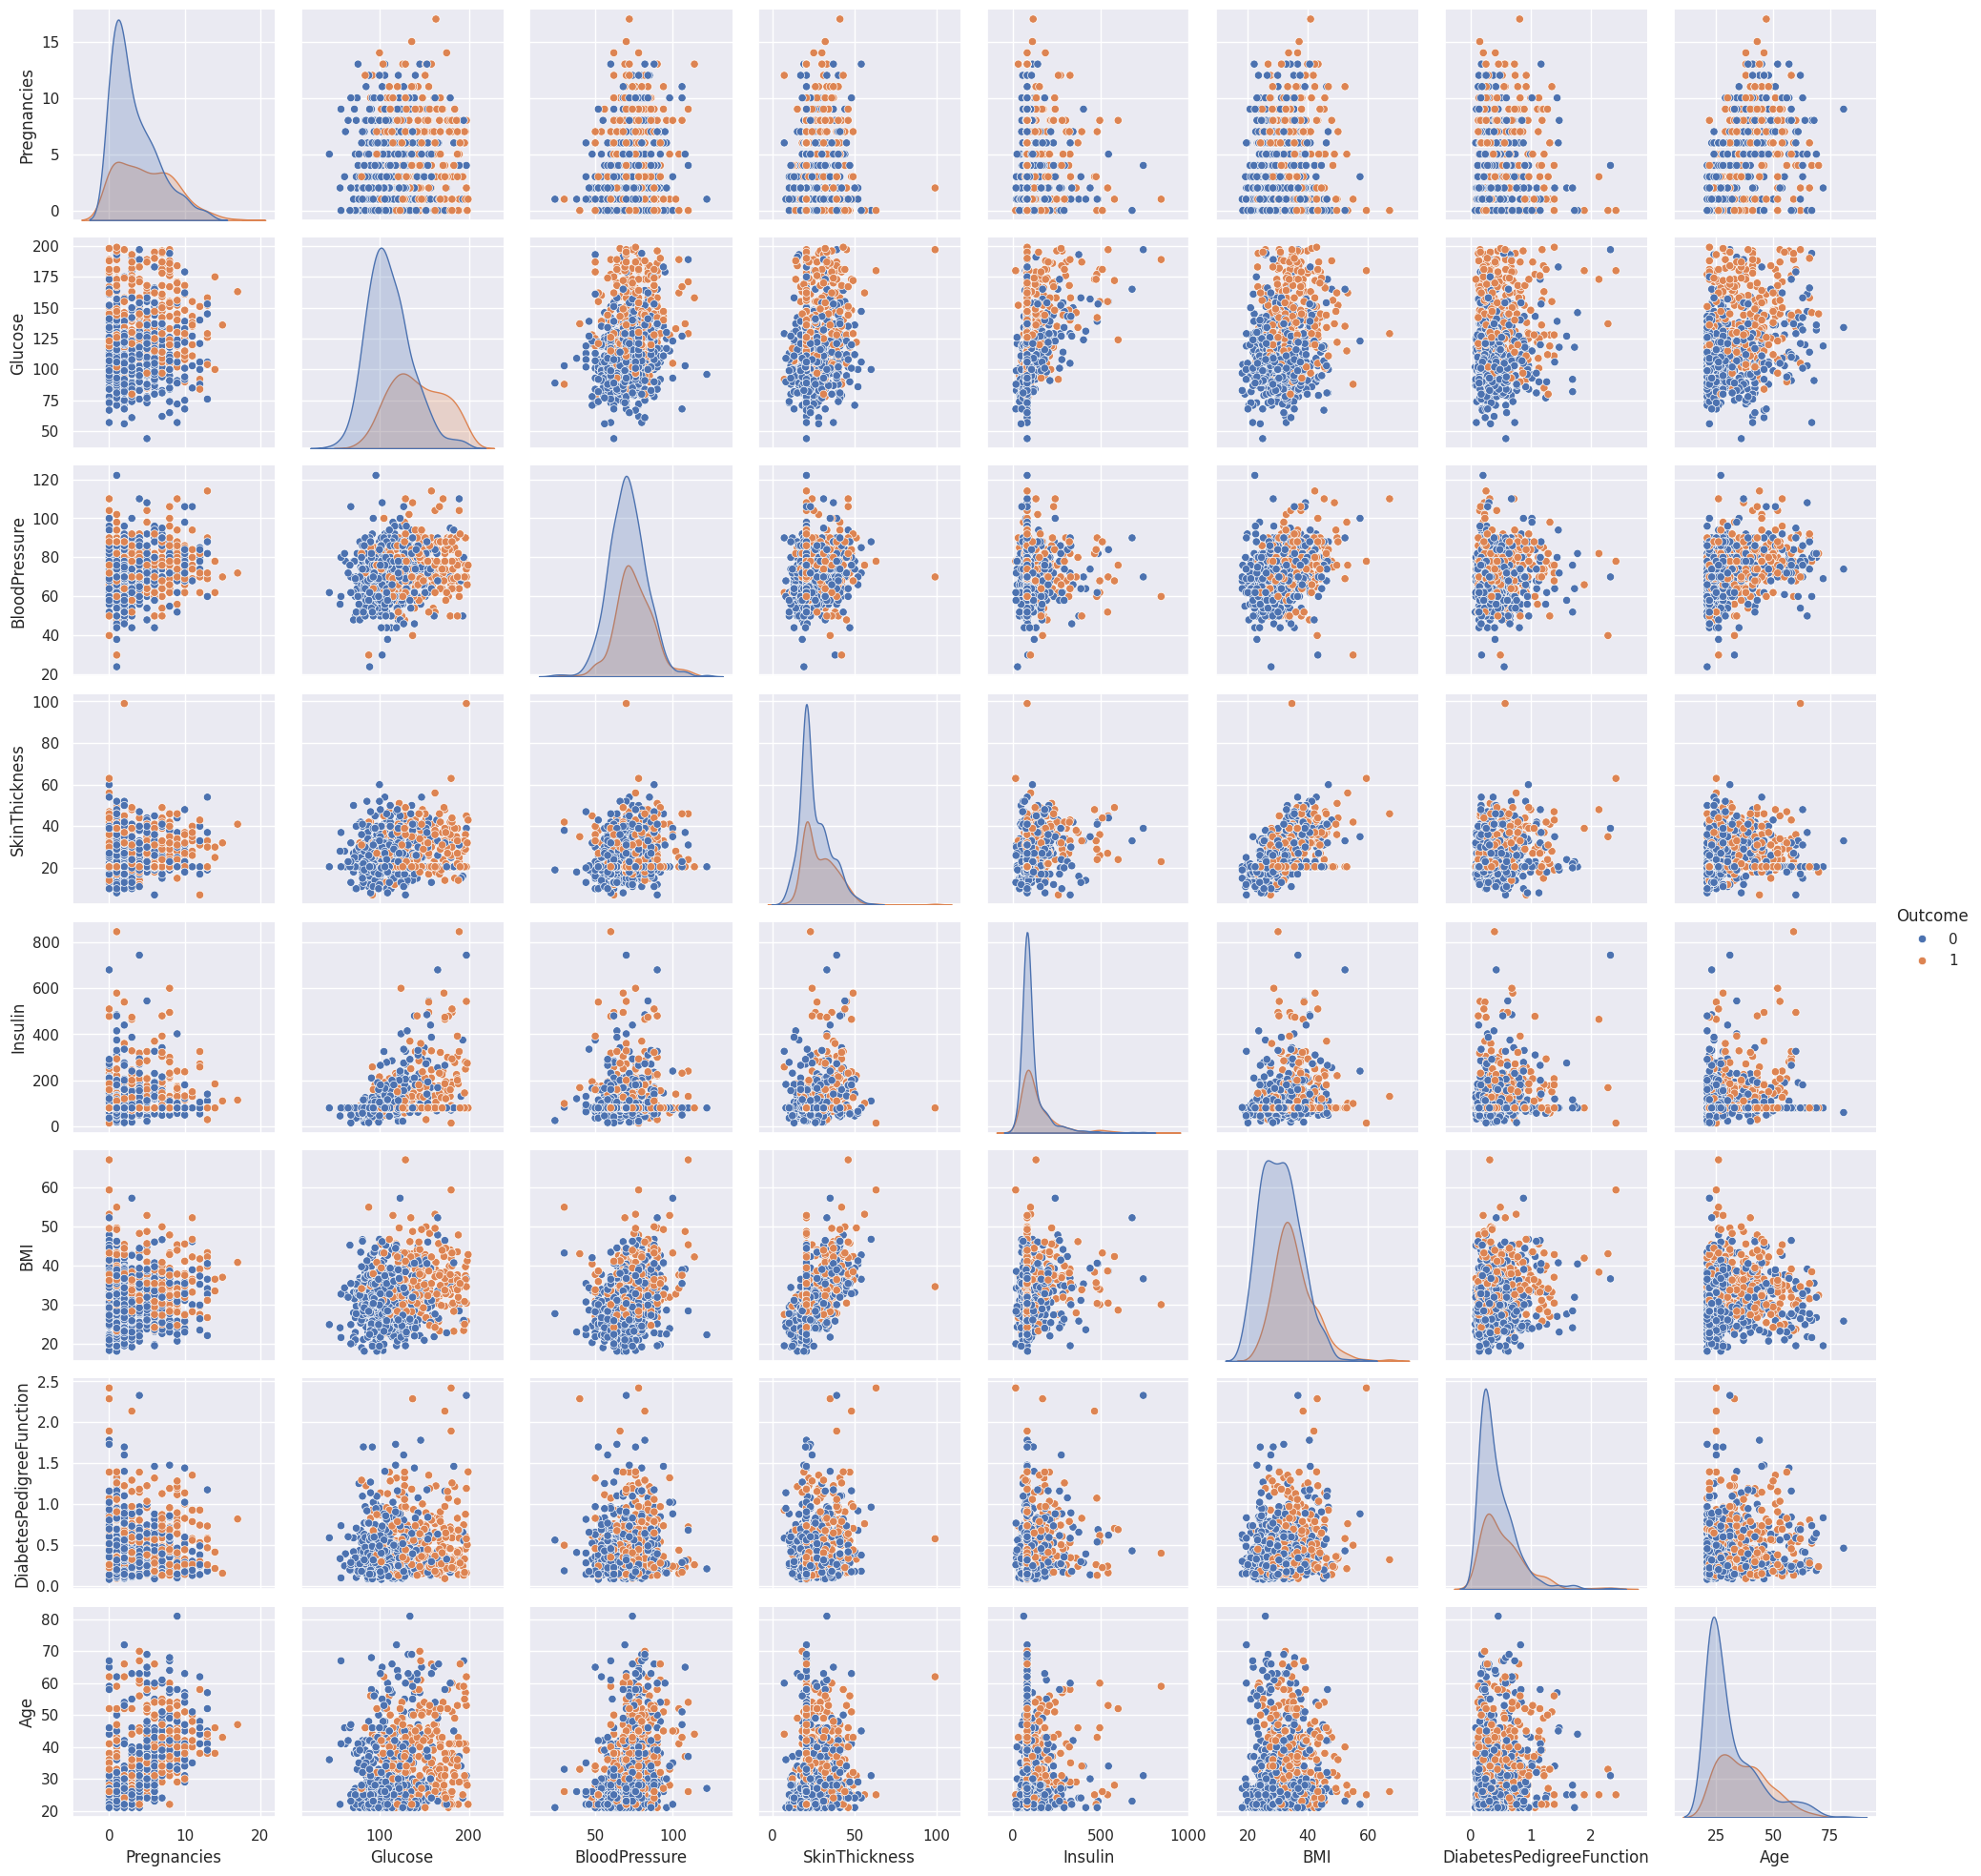

In [23]:
sns.pairplot(data, hue = "Outcome")

In [ ]:
sns.stripplot(x = "Pregnancies", y = "Age", data = data)

In [ ]:
sns.regplot(x = "SkinThickness", y = "Insulin", data = data)

In [ ]:
f, ax = plt.subplots(figsize = (10, 10))
ax = sns.swarmplot(x = "Pregnancies", y = "Age", hue = "Outcome",
                   palette = "Dark2", data = data)
ax = sns.set(style = "darkgrid")

# Q6. 위에서 보여준 그래프들(혹은 본인이 그려본 그래프)로부터 한 그래프를 선정하여, 해당 그래프에서 어떤 정보를 얻을수 있는지 작성하세요.

In [ ]:
# 예시) Outcome에 따른 상대도수를 보면 class 0이 65%를 차지하는 것으로 보아
# class imbalance가 심하지 않음을 알 수 있다.
# 따라서 data augmentation이 필요하지 않다.(SMOTE, ADASYN)


# sns.regplot(x = "SkinThickness", y = "Insulin", data = data)
# 산점도를 통해서 outlier 들이 존재하는 변수들을 확인할 수 있음. 이에 대한 처리가 필요해보임.

<Axes: xlabel='SkinThickness', ylabel='Insulin'>

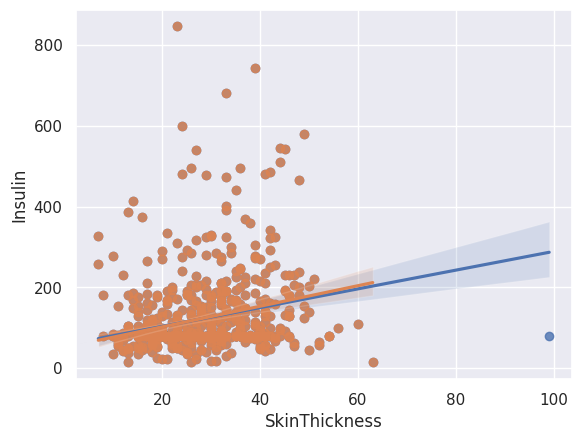

In [26]:
sns.regplot(x = "SkinThickness", y = "Insulin", data = data)

## 이상치 처리


<Axes: >

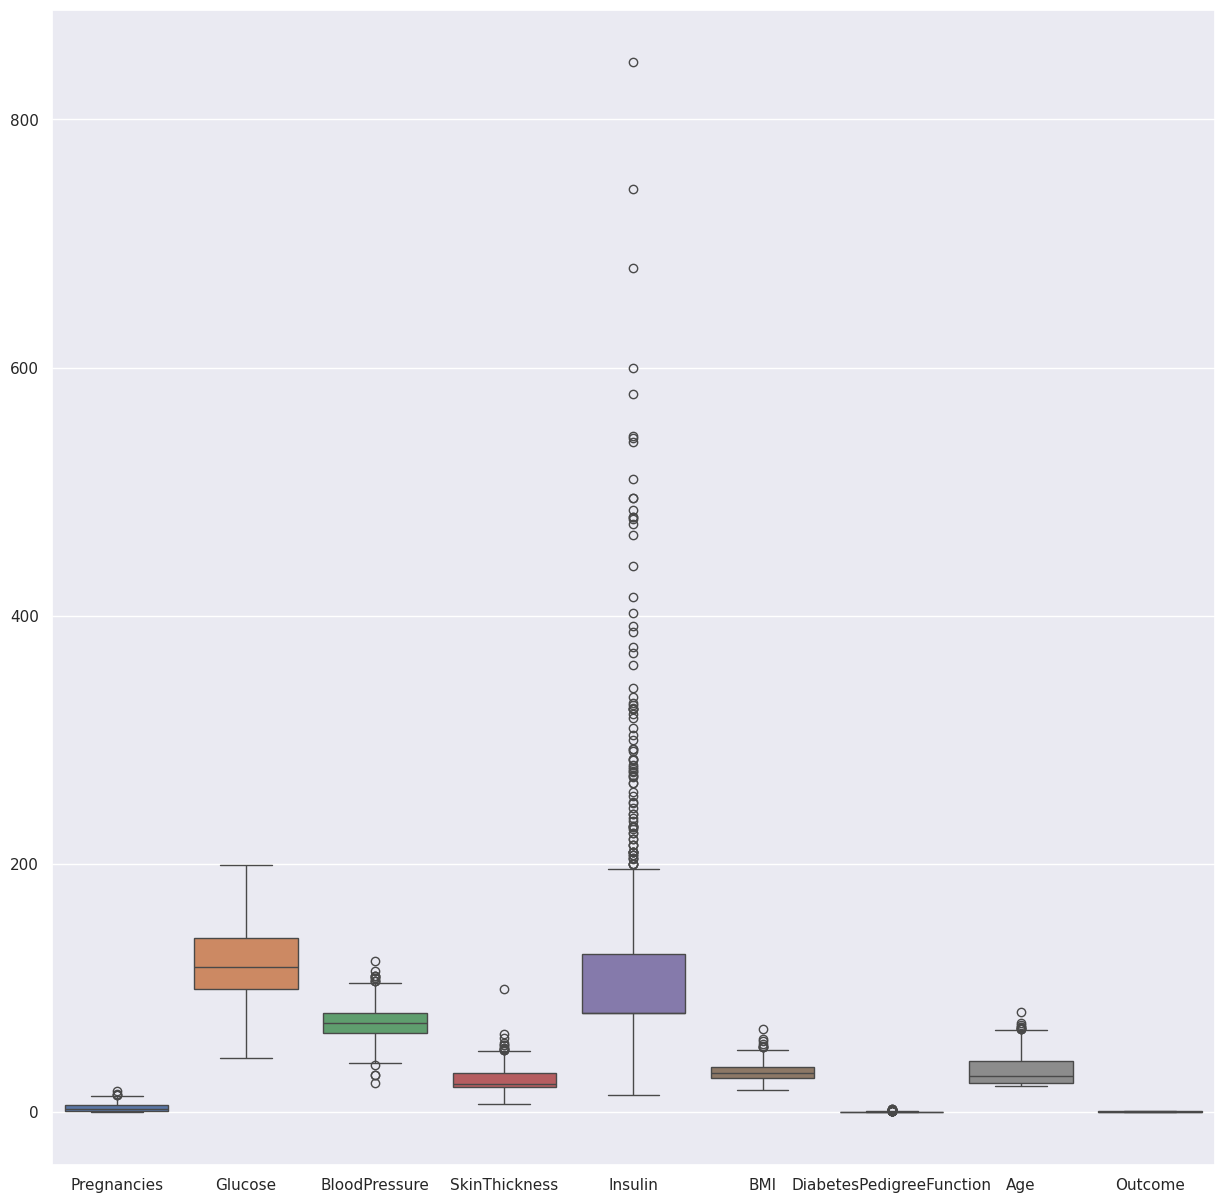

In [29]:
plt.figure(figsize = (15,15))
sns.boxplot(data = data)

`Insulin`에 대하여 심각한 이상치가 존재함을 알 수 있음

Quantile, drop등의 메소드를 사용해서 outlier를 제거할 수 있습니다.

기본적인 예시이므로 이렇게 해야한다가 아닌, 상황에 따라 다르게 하시면 됩니다.


<Axes: >

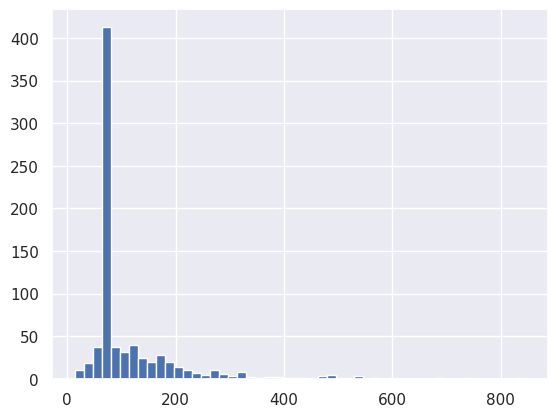

In [30]:
data["Insulin"].hist(bins = 50)

<Axes: >

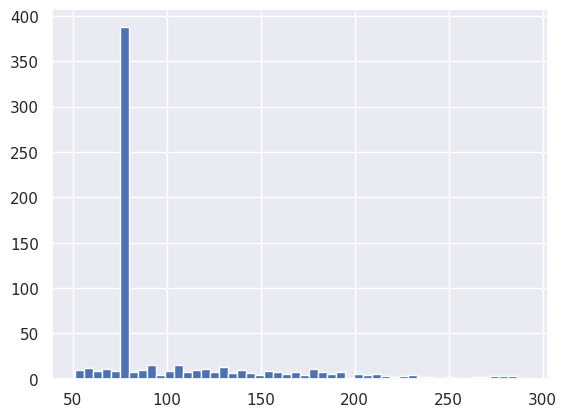

In [31]:
q95 = data["Insulin"].quantile(0.95)
q05 = data["Insulin"].quantile(0.05)

data = data[(data["Insulin"] < q95) & (data["Insulin"] > q05)]
data["Insulin"].hist(bins = 50)

## 정규화, 표준화

column간의 단위 차이를 조정해주는 역할

특정 컬럼의 단위 차이 때문에 output에 영향을 주는 것을 방지한다.

Scaling의 특징 때문에 범주형 변수에 대해서는 scaling이 불가능하다. 현재 코드에서는 범주형 변수가 없기 때문에 상관없지만, scaling을 해줄때는 범주형/수치형 변수를 나눠서 해줘야 한다. 당연히 target 변수는 제외해야 한다.

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data.drop(columns = ["Outcome"], axis = 1))
scaled_X = scaler.transform(data.drop(columns = ["Outcome"]))

In [33]:
X = pd.DataFrame(scaled_X, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.612652,0.922067,-0.041330,0.921135,-0.520121,0.170041,0.504418,1.391036
1,-0.857029,-1.245241,-0.542108,0.282844,-0.520121,-0.863711,-0.362568,-0.218846
2,1.200524,2.126127,-0.709034,-0.617524,-0.520121,-1.351051,0.645775,-0.134116
3,-0.857029,-1.107634,-0.542108,-0.355448,-0.227421,-0.642192,-0.940559,-1.066153
4,-1.150965,0.543648,-2.712144,0.921135,1.297863,1.572991,5.722043,-0.049385


In [34]:
y = data.Outcome

## Train/Test Split

Validation 을 위하여 Train Set내부에서 Train/Validation Set으로 split한다.

split은 random하게 이루어지며, validation set size를 portion으로 정할 수 있다.

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Model Selction

현재 모델링에 대해 배운 상태가 아니라서 크게 신경쓰지 않아도 됩니다.

ML Pipeline에서 model selection 및 train 단계가 있다는 것을 배우기 위한 과정입니다.


# Q7. Classification model의 종류에 대해 검색해보고, 각각의 특징(장단점) 가볍게 정리해보기.

그 중 한개의 모델에 대해 각각의 특징(장단점)에 대하여 왜 이러한 장단점이 있는지 공부해보기




[classification model]

1) KNN (k-nearest neighbor)

◼ 데이터를 분류하고 새로운 데이터 포인트의 카테고리를 결정할 때 K 개의 가장 가까운 포인트를 선점하고 그중 가장 많이 선택된 포인트의 카테고리로 이 새로운 데이터를 분류하는 방법

◼ 장점 :
1. 별도의 학습 과정이 필요하지 않다.
2. 데이터 분포의 가정이 필요하지 않다


◼ 단점 :  K가 1일 경우에는 학습데이터에서만 높은 정답률을 보이지만 새로운 데이터에 대한 예측이 어려운 Overfitting 현상이 발생/ 반대로 K가 100이 될 경우에는 모델이 너무나 일반화되어서 학습오류가 줄어들지 않는 Underfitting 현상이 발생
따라서 K의 수를 적절하게 조정하고 알맞은 K를 찾는것이 K-NN에서 중요


(2) Decision Tree(의사결정 트리)

◼ root에서부터 적절한 node를 선택하면서 진행하다가 최종 결정을 내리게 되는 model

◼ 장점 :
1. 결과가 나온 과정을 쉽게 추적할 수 있어 설명 가능성이 높음

2. 정규화 과정이 필요 없고, 데이터의 분포에 상관 없이 적용 가능


◼ 단점 : 주어진 데이터의 특성에만 치중하면 Overfitting이 발생하기 쉽기 때문에 그에 대한 대처가 필요.

(3) Random Forest

◼ Decision tree가 여러개 모여 Forest를 이룬 것. 다수의 Decision Tree 중에서 임의의 특징(Random Features)에 대한 결과를 모아 그 결과들 중 가장 많이 나온 결과값을 최종 결과값으로 정하는 구조

◼ 장점 :
1. 여러개의 Decision Tree에서 서로 다른 특징들을 토대로 결과값을 산출하기 때문에 Overfitting 문제점을 해결 가능
2. 데이터셋의 크기가 크더라도 결과예측의 정확도가 높음

◼ 단점 : 매우 많은 수의 의사결정나무를 만들어야 하므로 학습 시간이 오래 걸림


(4) Naive Bayes (나이브 베이즈)

◼ Naive Bayes는 데이터가 각 클래스에 속할 특징 확률을 계산하는 조건부 확률을 기반으로한 분류 방법.Naive는 예측한 특징이 상호 독립적이라는 가정 하에 확률계산을 단순화한 것이며, 모든 변수들의 특징의 가중치가 동등하다고 가정함. Bayes는 입력 특징이 클래스 전체의 확률 분포대비 특정 클래스에 속할 확률을 'Bayes 정리'를 기반으로 계산한 것을 말함.

◼ 장점 :
1. 훈련 속도가 매우 빠른 알고리즘
2. 데이터의 양에 큰 상관이 없는 편

◼ 단점 :
feature가 많으면 1보다 작은 값들을 여러 번 곱하면서 예측 확률 값이 매우 작아짐


(5) SVM (Support Vector Machine)

◼ Support Vector Machine은 주어진 데이터들을 분류하는 최적의 결정경계(Decision Boundary)를 찾는것임. Support Vector는 결정경계와 가장 가까이에 있는 데이터를 말하며 각각의 Support Vector간이의 거리를 Margin이라고 함. 따라서 Margin이 최대화 되는 결정경계를 찾는것이 Support Vector Machine의 목적.

◼ 장점 :
1. 과적합에 비교적 robust한 편이다.
2. feature가 적은 편이어도 적용할 수 있다.


◼ 단점 :
1. 학습이 오래걸리는 편이다.

2. 결과에 대한 해석이 어려워 설명 가능성이 낮다.


# Q8. 위에서 선택한 한개의 모델(Logistic 제외)에 대하여 Train 진행해보기

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# 데이터 컬럼 단위 정규화

normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.fit_transform(X_test)

In [49]:
#단순 모델링
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X_train, y_train)

#train set 성능
y_pred = rfc.predict(X_train)
acc = accuracy_score(y_train, y_pred)
print(f"정확도:{acc:0.4f}")

정확도:0.9834


In [50]:
#test set 성능
y_pred = rfc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"정확도:{acc:0.4f}")

정확도:0.7343


100%|██████████| 50/50 [00:39<00:00,  1.26it/s]


AttributeError: 'list' object has no attribute 'cv_scores'

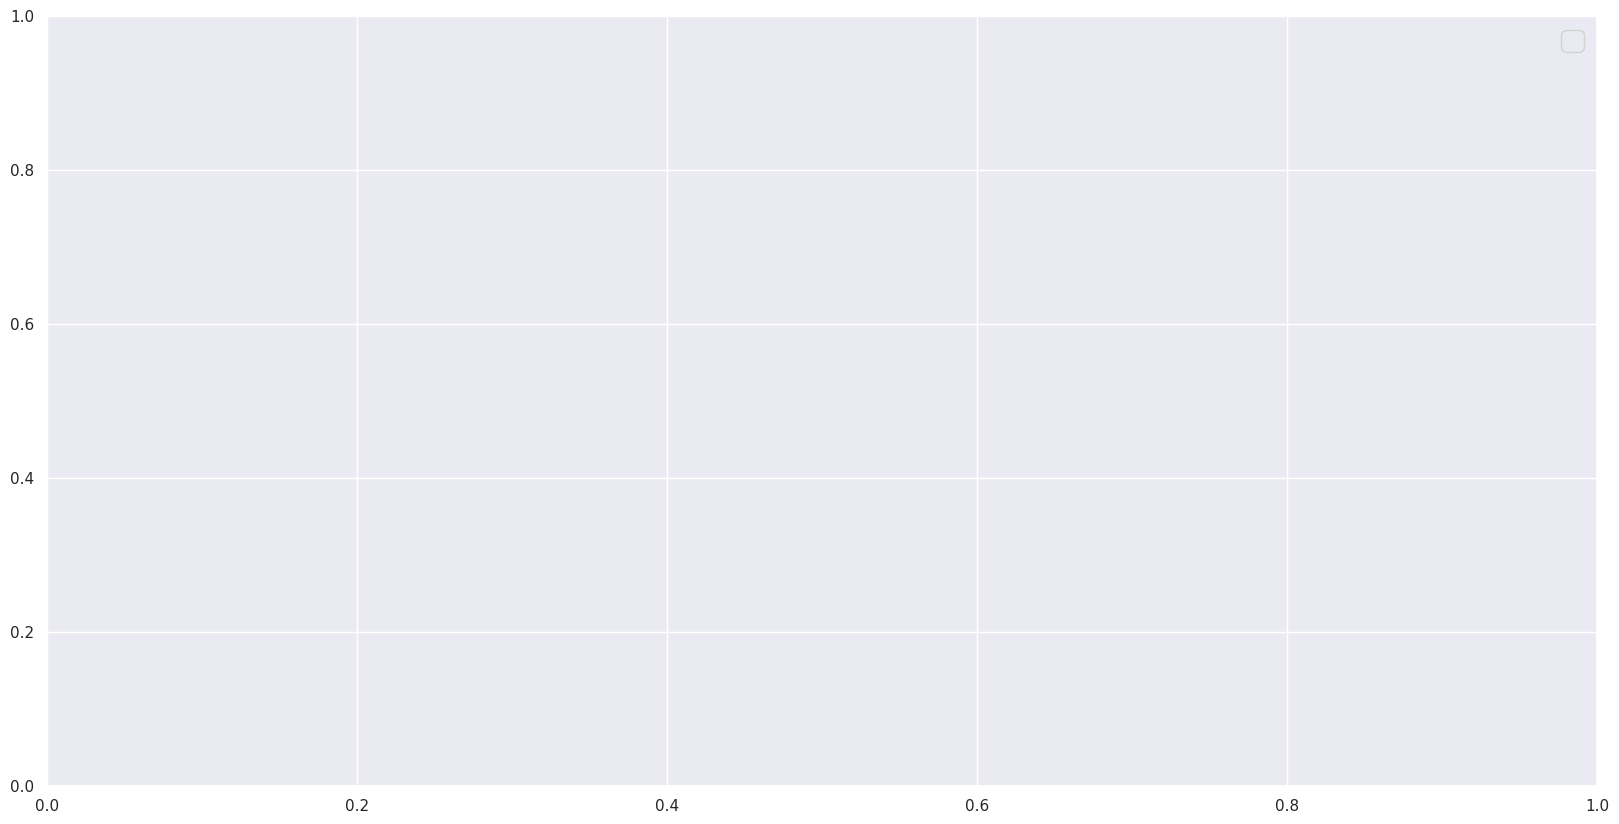

In [56]:
from sklearn.model_selection import cross_val_score
from tqdm import tqdm



cv_scores = []
estimator_list = [i for i in range(0, 50, 1)]
for i in tqdm(range(0, 50, 1)) :
  rfc = RandomForestClassifier(n_estimators=i+1,
                               n_jobs=-1,
                               random_state=42)
  score = cross_val_score(rfc, X_train, y_train, cv=10, scoring = "accuracy").mean()
  cv_scores.append(score)

best_e = [estimator_list[i] for i in range(len(cv_scores)) if cv_scores[i] == np.max(cv_scores)]
plt.figure(figsize=(20, 10))
plt.legend(["Cross validation scores"],fontsize=20)
plt.plot(estimator_list.cv_scores, marker='o', linestyle='dashed')
plt.xlabel("the num of trees", fontsize=20)
plt.ylabel("accuracy", fontsize=20)
plt.title("accuracy score", fontsize=20)
plt.axvline(best_e[0], color = 'r', linestyle='--', linewidth=2)
plt.show()

100%|██████████| 100/100 [03:05<00:00,  1.85s/it]


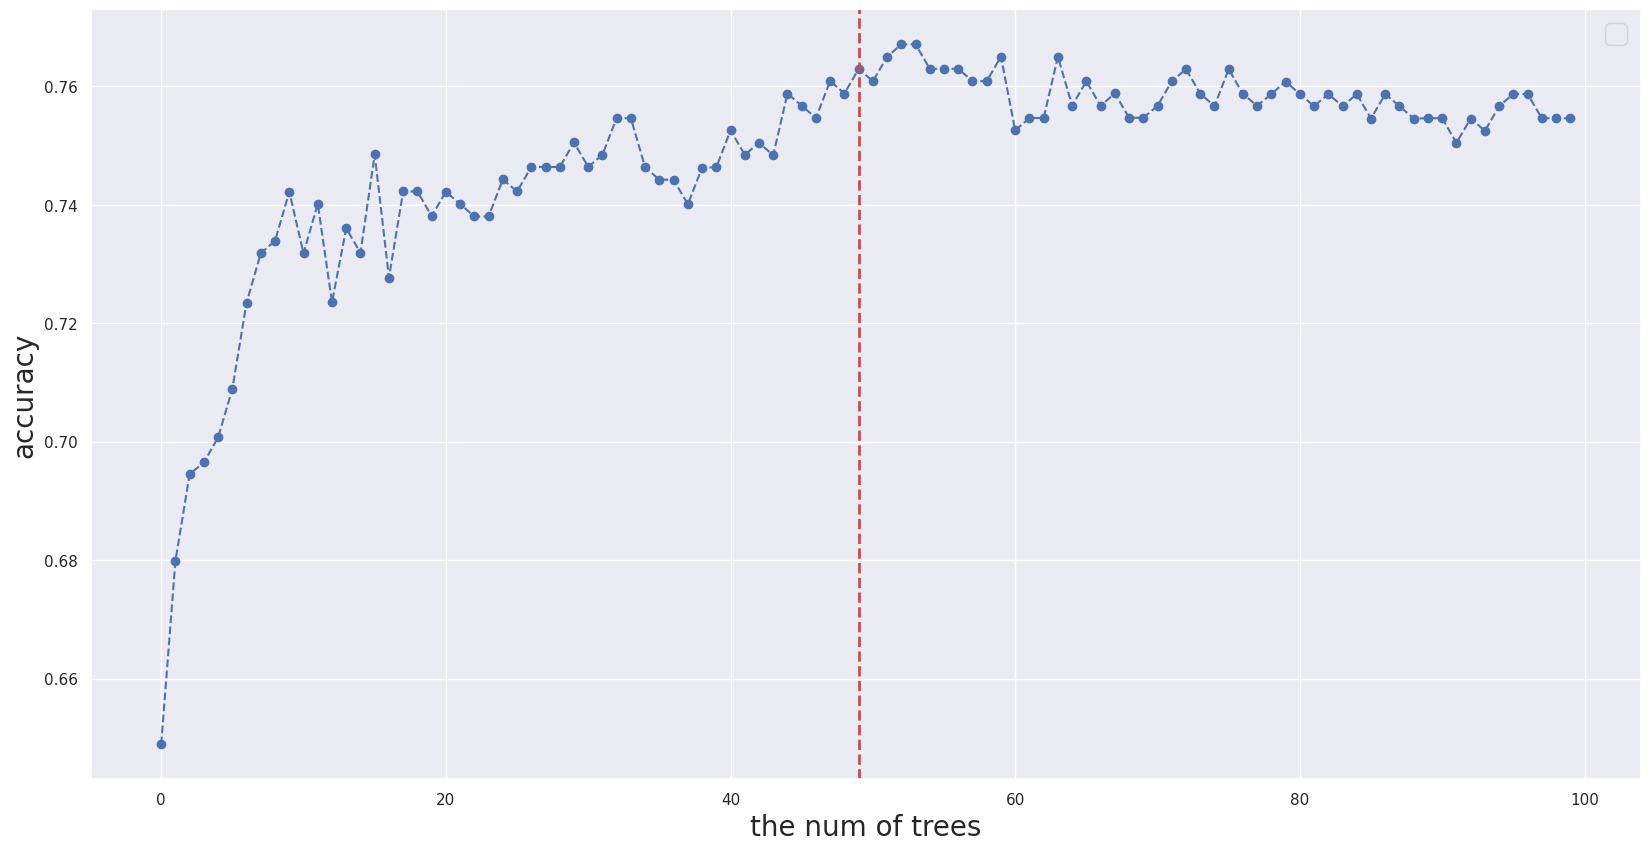

In [61]:
import matplotlib.pyplot as plt
from tqdm import tqdm

# cv_scores 리스트 초기화
cv_scores = []
estimator_list = [i for i in range(0, 100, 1)]

for i in tqdm(range(0, 100, 1)):
    rfc = RandomForestClassifier(n_estimators=i + 1,
                                 n_jobs=-1,
                                 random_state=42)
    score = cross_val_score(rfc, X_train, y_train, cv=10, scoring="accuracy").mean()
    cv_scores.append(score)

# 그래프 그리기
plt.figure(figsize=(20, 10))
plt.legend(["Cross validation scores"],fontsize=20)
plt.plot(estimator_list, cv_scores, marker='o', linestyle='dashed')
plt.xlabel("the num of trees", fontsize=20)
plt.ylabel("accuracy", fontsize=20)
plt.axvline(best_e[0], color='r', linestyle='--', linewidth=2)
plt.show()


In [62]:
print(f"최적의 tree개수:{(cv_scores.index(max(cv_scores)))+1}")
print(f"정확도:{max(cv_scores):0.4f}")

최적의 tree개수:53
정확도:0.7671


In [66]:
from sklearn.model_selection import GridSearchCV


rfc = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators' : [40, 50, 60],
    'max_depth' : [10, 15, 20],
    'max_leaf_nodes' : [50, 100, 200],
    'criterion' : ['gini', 'entropy'],
    'max_features' : ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator = rfc, param_grid=param_grid, cv=10, verbose=1, n_jobs=12)
CV_rfc.fit(X_train, y_train)

Fitting 10 folds for each of 162 candidates, totalling 1620 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             n_jobs=12,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [50, 100, 200],
                         'n_estimators': [40, 50, 60]},
             verbose=1)

In [67]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'auto',
 'max_leaf_nodes': 50,
 'n_estimators': 50}